In [2]:
# Imports
%matplotlib notebook 
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

In [3]:
# Functions copied from oscillator notebook for testing purposes
def sinusoid(freq=440.0, dur=1.0, srate=44100.0, amp=1.0, phase = 0.0): 
    t = np.linspace(0,dur,int(srate*dur))
    data = amp * np.sin(2*np.pi*freq *t+phase)
    return data

def oscillator(freq=440.0, dur=1.0, srate=44100.0, amp=1.0, phase=0.0, wave_type='sinusoid'):
    
    if wave_type not in ['sinusoid', 'triangle', 'square']:
        return None
    
    if wave_type == 'sinusoid':
        return sinusoid(freq=freq, dur=dur, srate=srate, amp=amp, phase=phase)
    
    wave = sinusoid(freq=freq, dur=dur, amp=amp)
    
    for i in range(1,20):
        harmonic = 2*i+1
        sin = sinusoid(freq=freq*harmonic, dur=dur, amp=amp)
        if wave_type == 'triangle':
            sin = sin*(np.power(-1,i))*(harmonic**-2)
        else:
            sin = sin / harmonic
        wave = np.add(wave, sin)
        
    if wave_type == 'square':
        return wave * 4 / np.pi 
    if wave_type == 'triangle':
        return wave * np.pi / 4

#### Input: 
```
envelope = { 
    "attack": dur(float), 
    "decay": dur(float), 
    "sustain":tuple(dur(float), amp(float)), 
    "release": dur(float) 
}
```
#### Output:
    * Tuple of amplitude track and length

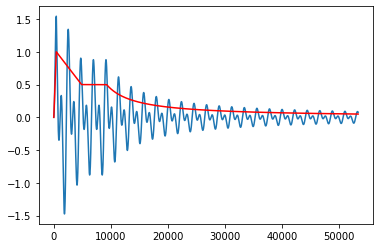

In [6]:
def envelope_amplitude(envelope={}, srate=44100):
    if envelope == {}:
        return None
    
    attack = np.linspace(0.0, 1.0, int(envelope['attack'] * srate))
    decay = np.linspace(1.0, envelope["sustain"][1], int(envelope['decay'] * srate))
    sustain = np.linspace(envelope["sustain"][1], envelope["sustain"][1], int(envelope['sustain'][0] * srate))
    release = np.reciprocal(np.linspace(1, 10, envelope['release'] * srate )) * envelope["sustain"][1] 
    
    amp_track = np.concatenate((attack, decay, sustain, release), axis=None)
    
    return amp_track, amp_track.shape[0]

# Sustain: (dur, amplitude)
envelope = {
    "attack": 0.01,
    "decay": 0.1,
    "sustain": (0.1, 0.5),
    "release": 1,
}
amp_track, length = envelope_amplitude(envelope)
signal = oscillator(dur=3, freq=20, wave_type="sinusoid")[:length]
signal += oscillator(dur=3, freq=40, wave_type="sinusoid")[:length]
plt.plot(signal * amp_track)
plt.plot(amp_track, color='red')
ipd.Audio(amp_track * signal ,rate=44100)